### Importing the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import ipywidgets as widgets
from ipywidgets import interact, interactive

import requests
import json

**Reading data from one of the urls**

In [3]:
raw_data = requests.get("https://api.covid19india.org/raw_data.json")
full_data= raw_data.json()['raw_data']
full_data[13903]
#pd.DataFrame.from_dict(full_data_list)

{'agebracket': '',
 'backupnotes': '',
 'contractedfromwhichpatientsuspected': '',
 'currentstatus': 'Hospitalized',
 'dateannounced': '17/04/2020',
 'detectedcity': '',
 'detecteddistrict': 'Surat',
 'detectedstate': 'Gujarat',
 'estimatedonsetdate': '',
 'gender': 'F',
 'nationality': '',
 'notes': 'Details awaited',
 'patientnumber': '13904',
 'source1': 'https://gujcovid19.gujarat.gov.in/uploads/pressbrief1704172020075526411.pdf',
 'source2': '',
 'source3': '',
 'statecode': 'GJ',
 'statepatientnumber': '',
 'statuschangedate': '17/04/2020',
 'typeoftransmission': ''}

In [6]:
raw_df =pd.DataFrame.from_dict(full_data)
raw_df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


#### Grouping at state and district levels

**State**

In [7]:
state_num = raw_df.groupby('detectedstate').size()
state_num = state_num.rename('Total_Confirmed').reset_index()
state_num['detectedstate'] = state_num['detectedstate'].str.replace(' and ',' & ', regex = False)
state_num['detectedstate'] = state_num['detectedstate'].str.strip()

state_num.head()

,detectedstate,Total_Confirmed
0,,63
1,Andaman & Nicobar Islands,12
2,Andhra Pradesh,603
3,Arunachal Pradesh,1
4,Assam,34


In [43]:
state_num['detectedstate'].str.replace(' and ',
                                       ' & ')

0                              
1     Andaman & Nicobar Islands
2                Andhra Pradesh
3             Arunachal Pradesh
4                         Assam
5                         Bihar
6                    Chandigarh
7                  Chhattisgarh
8                         Delhi
9                           Goa
10                      Gujarat
11                      Haryana
12             Himachal Pradesh
13              Jammu & Kashmir
14                    Jharkhand
15                    Karnataka
16                       Kerala
17                       Ladakh
18               Madhya Pradesh
19                  Maharashtra
20                      Manipur
21                    Meghalaya
22                      Mizoram
23                     Nagaland
24                       Odisha
25                   Puducherry
26                       Punjab
27                    Rajasthan
28                   Tamil Nadu
29                    Telangana
30                      Tripura
31      

In [42]:
state_num['detectedstate']

0                                
1     Andaman and Nicobar Islands
2                  Andhra Pradesh
3               Arunachal Pradesh
4                           Assam
5                           Bihar
6                      Chandigarh
7                    Chhattisgarh
8                           Delhi
9                             Goa
10                        Gujarat
11                        Haryana
12               Himachal Pradesh
13              Jammu and Kashmir
14                      Jharkhand
15                      Karnataka
16                         Kerala
17                         Ladakh
18                 Madhya Pradesh
19                    Maharashtra
20                        Manipur
21                      Meghalaya
22                        Mizoram
23                       Nagaland
24                         Odisha
25                     Puducherry
26                         Punjab
27                      Rajasthan
28                     Tamil Nadu
29            

**District**

In [8]:
dist_num = raw_df.groupby(['detectedstate','detecteddistrict']).size()
dist_num = dist_num.rename('Total_Confirmed').reset_index()
dist_num.head()

,detectedstate,detecteddistrict,Total_Confirmed
0,,,62
1,,Kannur,1
2,Andaman and Nicobar Islands,,5
3,Andaman and Nicobar Islands,North and Middle Andaman,1
4,Andaman and Nicobar Islands,South Andaman,6


Importing maps Statewise, Districwise  

https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4
http://projects.datameet.org/maps/districts/

In [9]:
fp = "Igismap//Indian_States.shp"
map_df = gpd.read_file(fp)

In [10]:
map_df['st_nm']= map_df['st_nm'].str.strip()
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [11]:
st_merged = map_df.merge(state_num.loc[:,('detectedstate','Total_Confirmed')], how = 'left', 
                         left_on ='st_nm', right_on='detectedstate' ).drop('detectedstate', axis = 1)
st_merged.head()

,st_nm,geometry,Total_Confirmed
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",34.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",85.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",21.0


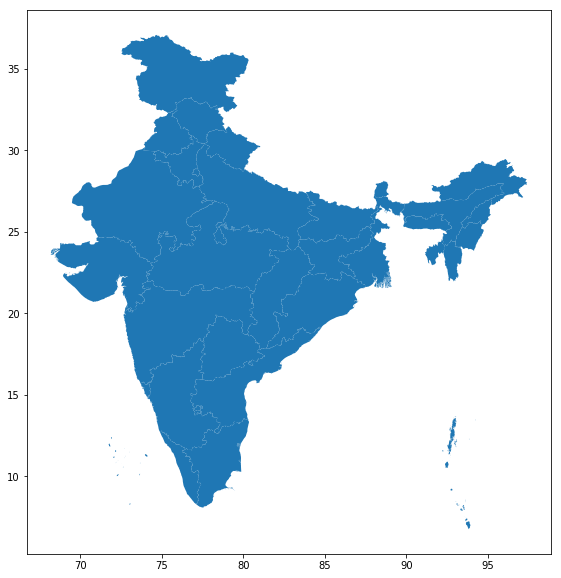

In [12]:
map_df.plot(figsize = (12,10));

### District Wise Data

In [13]:
fp = "./maps-master//Districts//Census_2011//2011_Dist.shp"
dmap_df = gpd.read_file(fp)

In [14]:
print(dmap_df.shape)
dmap_df.head()

(641, 6)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


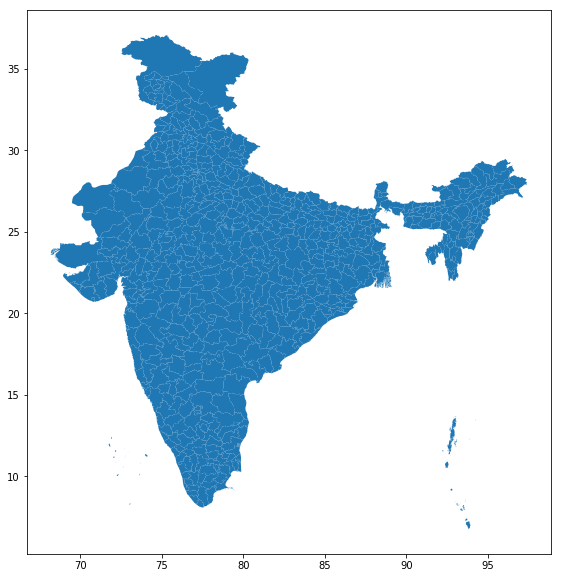

In [15]:
dmap_df.plot(figsize = (12,10));

In [16]:
dist_num.head()

,detectedstate,detecteddistrict,Total_Confirmed
0,,,62
1,,Kannur,1
2,Andaman and Nicobar Islands,,5
3,Andaman and Nicobar Islands,North and Middle Andaman,1
4,Andaman and Nicobar Islands,South Andaman,6


In [17]:
dt_merged = dmap_df.merge(dist_num.loc[:,('detectedstate','detecteddistrict','Total_Confirmed')], 
                       left_on = ['ST_NM','DISTRICT'], 
                       right_on = ['detectedstate','detecteddistrict'], how = 'left'). drop(['detectedstate',
                                                                                             'detecteddistrict'], 
                                                                                            axis = 1)
print(dt_merged.shape)
dt_merged.head()

(641, 7)


,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Total_Confirmed
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",NaN
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",172.0
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",765.0
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",28.0
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",1.0


In [18]:
dt_merged['ST_NM'].unique()

array(['Andhra Pradesh', 'Uttar Pradesh', 'Gujarat', 'Maharashtra',
       'Mizoram', 'Rajasthan', 'Kerala', 'Madhya Pradesh', 'Uttarakhand',
       'Haryana', 'Punjab', 'Jammu & Kashmir', 'Arunanchal Pradesh',
       'Odisha', 'Bihar', 'Tamil Nadu', 'Karnataka', 'Assam',
       'West Bengal', 'Chhattisgarh', 'Himachal Pradesh', 'Manipur',
       'Jharkhand', 'NCT of Delhi', 'Chandigarh',
       'Dadara & Nagar Havelli', 'Daman & Diu', 'Tripura', 'Nagaland',
       'Sikkim', 'Meghalaya', 'Puducherry', 'Goa',
       'Andaman & Nicobar Island', 'Lakshadweep'], dtype=object)

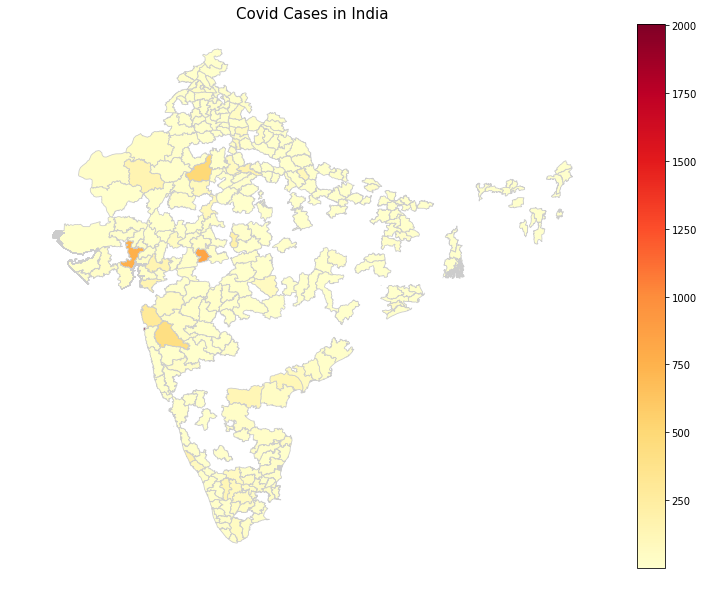

In [20]:
fig, ax = plt.subplots(1, figsize=(14, 10))
ax.axis('off')
ax.set_title('Covid Cases in India', fontdict={'fontsize': '15', 'fontweight' : '3'})
dt_merged.plot(column='Total_Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True);

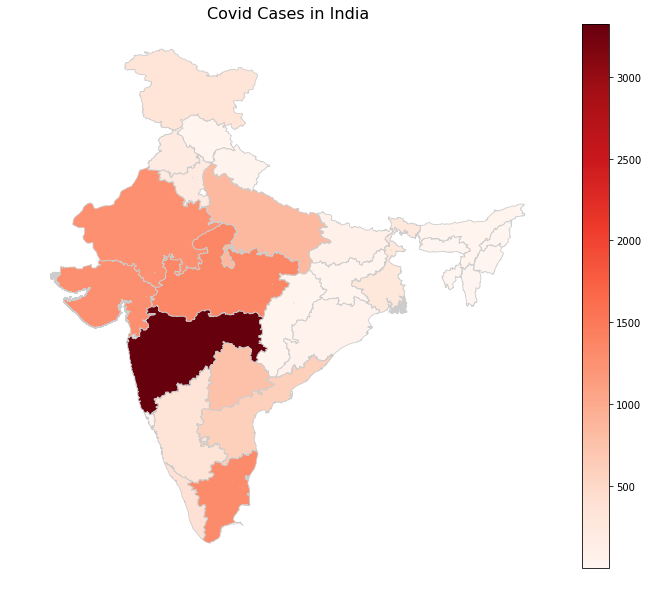

In [21]:
fig, ax = plt.subplots(1, figsize=(12, 10))
ax.axis('off')
ax.set_title('Covid Cases in India', fontdict={'fontsize': '16', 'fontweight' : '2'})

st_merged.plot(column='Total_Confirmed', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True);

In [22]:
@interact
def state_graph(State = dt_merged['ST_NM'].unique()):
    plot_df = dt_merged.loc[dt_merged['ST_NM']==State, :]
    fig, ax = plt.subplots(1, figsize=(14, 4))
    ax.axis('off')
    ax.set_title("Covid Cases in {}".format(State), fontdict={'fontsize': '12', 'fontweight' : '3'})
    plot_df.plot(column='Total_Confirmed', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True); 
    return

interactive(children=(Dropdown(description='State', options=('Andhra Pradesh', 'Uttar Pradesh', 'Gujarat', 'Ma…